In [1]:
from time import time

start = time()

## Regex classifier

In [2]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import re


#idea credit https://www.linkedin.com/pulse/regex-one-pattern-rule-them-all-find-bring-darkness-bind-carranza/
class RegexClassifier(BaseEstimator, RegressorMixin):
    """
    Language Classifier using Regular Expressions
    """

    language_regex_dict = {
        'el': r'([\u0370-\u03FF]+)\s?',  # Greek
        'en': r'([a-zA-Z]+)\s?',  # English
    }

    # STATIC INITALIZATION BLOCK
    # pre-compie all expressions to save execution time
    for lang in language_regex_dict.keys():
        language_regex_dict[lang] = re.compile(language_regex_dict[lang])


    def __init__(self, include_greeklish=True):
        """
        Initialize a new :class:`RegexClassifier` instance.

        :param include_greeklish: Optional. If True, include Greeklish in the language identification process.
        """
        self.include_greeklish = include_greeklish

    def predict(self, x):
        preds = []

        for text in x:
            pred = "other"

            if self.include_greeklish and \
                re.search(RegexClassifier.language_regex_dict["el"], text) and \
                re.search(RegexClassifier.language_regex_dict["en"], text):
                    pred = "greeklish"

            for lang_code, regex_pattern in RegexClassifier.language_regex_dict.items():
                match = re.search(regex_pattern, text)
                if match:
                    pred = lang_code
                    break
            preds.append(pred)
        return np.array(preds)
    
    def fit(self, x, y):
        return self

In [3]:
# Example usage
user_input_text = ["‰Ω†Â•ΩÔºå„Åì„Çå„ÅØ„Çµ„É≥„Éó„É´„Åß„Åô„ÄÇÏïàÎÖïÌïòÏÑ∏Ïöî", "this is an english sentence", "Œ¥ŒµŒΩ Œ±ŒΩœÑŒµœáœâ Œ±ŒªŒªŒø"]
detected_language = RegexClassifier().predict(user_input_text)
print(f"Detected Language Code: {detected_language}")

Detected Language Code: ['other' 'en' 'el']


## Defining the Gold Standard


### Greek-English identification dataset

https://aclanthology.org/L06-1229/
https://aclanthology.org/L04-1369/
https://huggingface.co/datasets/papluca/language-identification

In [4]:
import pandas as pd


def dataset_to_pd(dataset_dict: dict) -> pd.DataFrame:
    df_ls = []
    label_array = np.empty(shape=(sum([len(dataset) for dataset in dataset_dict.values()])), dtype=object)
    last_idx = -1

    for label, dataset in dataset_dict.items():
        new_last_idx = len(dataset) + last_idx
        label_array.put(np.arange(last_idx+1, new_last_idx+1, 1), label)
        last_idx = new_last_idx

        df_ls.append(pd.DataFrame(dataset))

    full_df = pd.concat(df_ls, ignore_index=True)
    full_df["set"] = label_array
    full_df.insert(0, "set", full_df.pop("set"))

    return full_df

In [5]:
from datasets import load_dataset


dataset_dict = load_dataset("papluca/language-identification")
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 70000
    })
    validation: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
})

In [6]:
lang_df = dataset_to_pd(dataset_dict)
lang_df

set labels                                               text
0      train     pt  os chefes de defesa da est√≥nia, let√≥nia, litu√¢...
1      train     bg  —Ä–∞–∑–º–µ—Ä—ä—Ç –Ω–∞ —Ö–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–Ω–∞—Ç–∞ –º—Ä–µ–∂–∞ –º–æ–∂–µ –¥–∞ –±—ä–¥–µ ...
2      train     zh  ÂæàÂ•ΩÔºå‰ª•Ââç‰ªé‰∏çÂéªËØÑ‰ª∑Ôºå‰∏çÁü•ÈÅìÊµ™Ë¥π‰∫ÜÂ§öÂ∞ëÁßØÂàÜÔºåÁé∞Âú®Áü•ÈÅìÁßØÂàÜÂèØ‰ª•Êç¢Èí±ÔºåÂ∞±Ë¶ÅÂ•ΩÂ•ΩËØÑ‰ª∑‰∫ÜÔºåÂêéÊù•ÊàëÂ∞±Êää...
3      train     th  ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö ‡∏Ç‡∏≠‡∏á‡πÄ‡∏Å‡πà‡∏≤ ‡∏ó‡∏µ‡πà ‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏±‡∏á ‡∏•‡∏≠‡∏á   honeychurch  ...
4      train     ru                             –û–Ω —É–≤–µ–ª–∏—á–∏–ª –¥–∞–≤–ª–µ–Ω–∏–µ .
...      ...    ...                                                ...
89995   test     zh                               Âè≤ÊñôÂæàÂÖÖÂàÜÔºåÂØπÂ≤∏ÁöÑÂæàÂ§öËßÇÁÇπ‰∏éÂ§ßÈôÜËø•ÂºÇÂïä„ÄÇ
89996   test     tr  √ñrneƒüin, te≈ühis Yunanca bir kelimeden alƒ±ndƒ± (...
89997   test     vi  N·∫øu lite/light ch·ªâ ƒë∆°n gi·∫£n l√† m√¥ t·∫£ m·ªôt ƒë·∫∑c t...
89998   test     bg  –ù–∞–ø—Ä–∏–º–µ—Ä, –µ–¥–Ω–∞ —â–∞—Ç—Å–∫–∞ —Å—Ç–æ–ª–∏—Ü–∞, –∫–æ—è—Ç–æ –ø–æ—Å–µ—Ç–∏—Ö–º–µ...
89999   test     pl                   Mam dla ciebie kilka propozycji:

[90000 rows x 3 columns]

In [7]:
en_gr_cond = lang_df.labels.eq("el") | lang_df.labels.eq("en")
en_gr_df = lang_df.loc[en_gr_cond, ["labels", "text"]]
en_gr_df

labels                                               text
18        el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
39        en                    Didnt really seem to work much.
40        el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
49        en  Highly recommend for those who don't like bein...
75        el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...      ...                                                ...
89961     en  It's super cute, really soft. Print is fine bu...
89965     en  One of them worked, the other one didn't. Ther...
89978     en   I only received one out of the three strikers :(
89982     el  ŒüŒπ ŒøœÅŒ≥Œ±ŒΩŒπœÉŒºŒøŒØ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± ŒµŒØŒΩŒ±Œπ œÉŒµ Œ∏Œ≠œÉŒ∑ ŒΩŒ± ŒºŒµœÑœÅŒÆ...
89986     el  Œ§Œø Abeam ŒºŒµ œÑŒ∑ŒΩ Arabella, Œ±œÄŒ≠ŒΩŒ±ŒΩœÑŒπ Œ±œÄœå œÑŒø ŒªŒπŒºŒ¨...

[9000 rows x 2 columns]

In [8]:
others_df = lang_df.loc[~en_gr_cond, ["labels", "text"]]
others_df = others_df.sample(15000)
others_df.labels = "other"
others_df

labels                                               text
55726  other  „Éë„Éá„Ç£„É≥„Éà„É≥„ÅÆÁ¥≥Â£´„Åï„Å®„ÄÅË™†ÂÆü„Åï„Å®„ÄÅÂèØÊÑõ„Çâ„Åó„Åï „Éñ„É©„Ç¶„É≥„Åï„Çì‰∏ÄÂÆ∂„ÅÆÊöñ„Åã„ÅÑ„ÇÇ„Å¶„Å™„Åó Êò†ÁîªÈ§®„ÅßË¶≥„Åæ...
58166  other  One for depression , i guess , mwingine wa kua...
8816   other             Lance Armstrong confessa tutto a Oprah
87904  other  Â∞±‰∏æ‰∏Ä‰∏™‰æãÂ≠ê,‰ªÄ‰πàÂè´ÂÅö"‰Ω†ÁöÑÂêçÂ≠óÂ•ΩÂÉèÂæàÁÜü"??? ‰Ω†ËÆ©ÊàëÁúãÁúãÂêçÂ≠óÊòØÁÖÆÁÜüÁöÑËøòÊòØÁÇíÁÜüÁöÑÂïä... ...
38999  other                                 Ok em nghƒ© la lu·∫≠t
...      ...                                                ...
81190  other  –ù–∞–π-–≥–æ–ª–µ–º–∏—è—Ç –∑–∞–ª–∏–≤ –Ω–∞ —Å–µ–≤–µ—Ä–æ–∑–∞–ø–∞–¥–Ω–æ—Ç–æ –∫—Ä–∞–π–±—Ä–µ–∂...
72797  other            ÿßŸàÿ± ÿ™ŸÖ ⁄©ŸàŸÜ ÿ≥€í ÿßÿ®ŸÑ€åÿ≥ €ÅŸàÿü ÿ¢ÿÆÿ± Ÿà€Å Ÿæ⁄æŸπ Ÿæ⁄ëÿß.
43088  other  Para llegar hasta la funci√≥n radio es un pe√±az...
55185  other  ‡∏°‡∏µ ‡πÇ‡∏£‡∏á‡πÅ‡∏£‡∏° ‡πÄ‡∏õ‡πá‡∏ô ‡πÇ‡∏´‡∏• ‡∏´‡∏£‡∏∑‡∏≠ ‡πÇ‡∏£‡∏á‡πÅ‡∏£‡∏° ‡∏ã‡∏∂‡πà‡∏á ‡∏õ‡∏Å‡∏ï‡∏¥ ‡∏à‡∏∞ ‡∏à‡∏≠...
60771  other  No me ha gustado tener que comprar las dos tap...

[15000 rows x 2 columns]

In [9]:
gold1_df = pd.concat([en_gr_df, others_df], axis=0, ignore_index=True, copy=False)
gold1_df

labels                                               text
0         el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
1         en                    Didnt really seem to work much.
2         el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
3         en  Highly recommend for those who don't like bein...
4         el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...      ...                                                ...
23995  other  –ù–∞–π-–≥–æ–ª–µ–º–∏—è—Ç –∑–∞–ª–∏–≤ –Ω–∞ —Å–µ–≤–µ—Ä–æ–∑–∞–ø–∞–¥–Ω–æ—Ç–æ –∫—Ä–∞–π–±—Ä–µ–∂...
23996  other            ÿßŸàÿ± ÿ™ŸÖ ⁄©ŸàŸÜ ÿ≥€í ÿßÿ®ŸÑ€åÿ≥ €ÅŸàÿü ÿ¢ÿÆÿ± Ÿà€Å Ÿæ⁄æŸπ Ÿæ⁄ëÿß.
23997  other  Para llegar hasta la funci√≥n radio es un pe√±az...
23998  other  ‡∏°‡∏µ ‡πÇ‡∏£‡∏á‡πÅ‡∏£‡∏° ‡πÄ‡∏õ‡πá‡∏ô ‡πÇ‡∏´‡∏• ‡∏´‡∏£‡∏∑‡∏≠ ‡πÇ‡∏£‡∏á‡πÅ‡∏£‡∏° ‡∏ã‡∏∂‡πà‡∏á ‡∏õ‡∏Å‡∏ï‡∏¥ ‡∏à‡∏∞ ‡∏à‡∏≠...
23999  other  No me ha gustado tener que comprar las dos tap...

[24000 rows x 2 columns]

### Greek-Greeklish identification dataset

In [10]:
head_url = "https://forum.warmane.com"
warmane_url = "https://forum.warmane.com/forumdisplay.php?f=20"

In [11]:
from src.crawling import fetch_soup
from tasks.warmane import parse_warmane_thread
from tqdm import tqdm


threads = []

for page in range(1, 9):
    url = warmane_url + f"&page={page}"
    soup = fetch_soup(url)

    print(f"Processing page {page} of 8...")
    thread_tags = soup.find_all("li", {"class": "threadbit"})
    for thread_tag in tqdm(thread_tags):
        thread = parse_warmane_thread(head_url, thread_tag)
        threads.append(thread)

Processing page 1 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:04<00:00,  4.29it/s]


Processing page 2 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.69it/s]


Processing page 3 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.64it/s]


Processing page 4 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.45it/s]


Processing page 5 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.07it/s]


Processing page 6 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:04<00:00,  4.80it/s]


Processing page 7 of 8...


 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                            | 13/20 [00:02<00:01,  5.33it/s]

ERROR: Failed to get information on post  https://forum.warmane.com/showthread.php?t=272585


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.47it/s]


Processing page 8 of 8...


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                               | 5/8 [00:00<00:00,  5.26it/s]

ERROR: Failed to get information on post  https://forum.warmane.com/showthread.php?t=278731


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:01<00:00,  5.39it/s]


In [12]:
import itertools

# flatten nested lists 
posts = set(itertools.chain.from_iterable([thread.posts for thread in threads]))
len(posts)

414

In [13]:
import pandas as pd

warmane_df = pd.DataFrame.from_records([post.__dict__ for post in posts], index="id")
warmane_df.reply_to = warmane_df.reply_to.fillna(-1).astype(int)
warmane_df

thread_id           author  \
id                                    
2926596     384475           Ripsin   
2473988     300013           v4gflo   
2420747     290921          AlexPan   
2981903     399822  xAchillesGate4x   
2879517     371804            Csdas   
...            ...              ...   
2877428     353812        Shiverbro   
3069941     423611  crystallenia898   
2801654     350071      Draculation   
2873339     370241           Ripsin   
2410495     289030          boolouk   

                                                  contents       date  \
id                                                                      
2926596  Kalhspera paides,\n\r\nEimai arketo kairo ston... 2018-05-22   
2473988  geia sas.psaxnw ellhniko guild ston Deathwing ... 2015-06-17   
2420747  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \... 2015-03-24   
2981903  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin... 2019-03-03   
2879517  Opoios gnwrizei kati as mou kanei /w Dremoria ... 2017-11-29   
...                                                    ...        ...   
2877428       kalos private aksizei na ksekiniseis paidia? 2017-11-21   
3069941  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº... 2020-07-26   
2801654                                   Bump! ICC25 6/12 2017-05-07   
2873339  Kalhspera tha ithela na rwthsw an kapoios gnwr... 2017-11-07   
2410495  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ... 2015-03-13   

         reply_to  
id                 
2926596        -1  
2473988        -1  
2420747        -1  
2981903        -1  
2879517        -1  
...           ...  
2877428   2875915  
3069941   3068345  
2801654   2795443  
2873339        -1  
2410495   2409274  

[414 rows x 5 columns]

In [14]:
empty_contents = warmane_df.contents.apply(lambda x: x.isspace() | len(x)==0)
warmane_df[empty_contents]

thread_id     author contents       date  reply_to
id                                                         
3082464     427259  malakas17          2020-10-20   3081822
3113236     427259  malakas17          2021-05-12   3113009
3099161     431660  malakas17          2021-02-10   3096432
3113819     427259  malakas17          2021-05-16   3113236
3099593     427259    boonick          2021-02-14   3093400
3081820     427259  malakas17          2020-10-16   3080427
3081822     427259  malakas17          2020-10-16   3081820

In [15]:
warmane_df = warmane_df[~empty_contents]

In [16]:
regex_model = RegexClassifier(include_greeklish=False)
preds = regex_model.predict(warmane_df.contents)

In [17]:
warmane_df[preds=="en"].contents

id
2926596    Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988    geia sas.psaxnw ellhniko guild ston Deathwing ...
2879517    Opoios gnwrizei kati as mou kanei /w Dremoria ...
2959390               Bubblethesap Icecrown wotlk horde belf
2947119    den se vrisko kane add evvi  .\nmou leei den u...
                                 ...                        
2557881                          Paokara einai padou file :P
2602989    Me to plevro ton Allience ayti ti fora Oi <<An...
2877428         kalos private aksizei na ksekiniseis paidia?
2801654                                     Bump! ICC25 6/12
2873339    Kalhspera tha ithela na rwthsw an kapoios gnwr...
Name: contents, Length: 227, dtype: object

In [18]:
warmane_df[preds=="greeklish"].contents

Series([], Name: contents, dtype: object)

In [19]:
warmane_df[preds=="el"].contents

id
2420747    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2959391    ŒöŒ±ŒªŒ∑œÉœÄŒµœÅŒ± Œ∏Œ± œÄŒ±œÇ œÉœÑŒπœÇ ŒπŒ¥ŒπœåœÑŒ∑œÑŒµœÇ (properties) œÉ...
2719776    Originally Posted by celphecil\n\nŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± Œ£œâ...
2971700    ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œø guild , œàŒ±œáŒΩŒøœÖŒºŒµ Œ±œÑŒøŒºŒ± Œ≥ŒπŒ± runs ICC10...
                                 ...                        
2609122    œÄœéœÅœâœÉŒ∑ ŒºŒµ œÑŒ± ŒºŒπœÉŒ¨ Dung, Quests Œ∫Œ±Œπ Raids bugge...
2707437    ŒõŒøŒπœÄœåŒΩ ŒºŒ±Œ≥ŒµœÇ,ŒæŒ≠œÅŒµŒπ Œ∫Œ¨œÄŒøŒπŒøœÇ Œ≥ŒπŒ±œÑŒØ Œ¥ŒµŒΩ Œ≥ŒØŒΩŒµœÑŒ±Œπ ŒΩ...
2777071    INACTIVE\n\n\n <Northern Defiance>  ŒöŒ±ŒπŒΩŒøœçœÅŒ≥ŒπŒ±...
3069941    Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2410495    ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...
Name: contents, Length: 180, dtype: object

In [20]:
labels = np.where(preds=="en", "greeklish", "el")
gold2_df = pd.DataFrame({"labels": labels, "text": warmane_df.contents})
gold2_df

labels                                               text
id                                                                   
2926596  greeklish  Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988  greeklish  geia sas.psaxnw ellhniko guild ston Deathwing ...
2420747         el  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903         el  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2879517  greeklish  Opoios gnwrizei kati as mou kanei /w Dremoria ...
...            ...                                                ...
2877428  greeklish       kalos private aksizei na ksekiniseis paidia?
3069941         el  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2801654  greeklish                                   Bump! ICC25 6/12
2873339  greeklish  Kalhspera tha ithela na rwthsw an kapoios gnwr...
2410495         el  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...

[407 rows x 2 columns]

In [21]:
gold_df = pd.concat([gold1_df, gold2_df])
gold_df

labels                                               text
0               el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
1               en                    Didnt really seem to work much.
2               el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
3               en  Highly recommend for those who don't like bein...
4               el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...            ...                                                ...
2877428  greeklish       kalos private aksizei na ksekiniseis paidia?
3069941         el  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2801654  greeklish                                   Bump! ICC25 6/12
2873339  greeklish  Kalhspera tha ithela na rwthsw an kapoios gnwr...
2410495         el  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...

[24407 rows x 2 columns]

In [22]:
import os


OUTPUT_DIR = "output"

def csv_output(df: pd.DataFrame, filename: str) -> None:
    file = os.path.join(OUTPUT_DIR, filename)
    df.to_csv(file)
    print(f"File saved successfully as {file}")

In [23]:
csv_output(gold_df, "gold.csv")

File saved successfully as output\gold.csv


## Youtube Crawling

In [24]:
from src.crawling import ChromeDriverManager, jupyter_options


ChromeDriverManager.set_options(jupyter_options())

In [25]:
from tasks.youtube import scrape_youtube, extract_search_results, extract_comments


# "greek songs" search in Greek
search_url = "https://www.youtube.com/results?search_query=%CE%B5%CE%BB%CE%BB%CE%B7%CE%BD%CE%B9%CE%BA%CE%B1+%CF%84%CF%81%CE%B1%CE%B3%CE%BF%CF%85%CE%B4%CE%B9%CE%B1"
search_soup = scrape_youtube(ChromeDriverManager.get(), search_url, max_scrolls=10, verbose=True)

Scrolling (0 out of max 10)...
Scrolling (1 out of max 10)...
Scrolling (2 out of max 10)...
Scrolling (3 out of max 10)...
Scrolling (4 out of max 10)...
Scrolling (5 out of max 10)...
Scrolling (6 out of max 10)...
Scrolling (7 out of max 10)...
Scrolling (8 out of max 10)...
Scrolling (9 out of max 10)...
Scrolling (10 out of max 10)...


In [26]:
results = extract_search_results(search_soup)
results_df = pd.DataFrame({"title": results[0], "link": results[1]})
results_df

title  \
0    \n\nGreek Hits 2023 | Non-Stop Mix by Elegant ...   
1    \n\nŒ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠...   
2    \n\nŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Mu...   
3    \n\nGreek Mix Songs | Love Hits Non-Stop | Gal...   
4              \n\n00's GREEK MIX | KAPSOURA EDITION\n   
..                                                 ...   
219  \n\nŒ†Œ≠œÑœÅŒøœÇ ŒôŒ±Œ∫œâŒ≤ŒØŒ¥Œ∑œÇ - ŒìŒπŒ± Œ†Œ¨ŒΩœÑŒ± - Official Mu...   
220  \n\nŒ§Œø Œ§œÅŒµŒΩŒø üöÇ Œ†Œ±ŒπŒ¥ŒπŒ∫Œ± Œ§œÅŒ±Œ≥ŒøœÖŒ¥ŒπŒ± - HeyKids ŒïŒªŒª...   
221  \n\nTrannos x Thodoris Verlis - Dubai (Officia...   
222  \n\nŒ§œÅŒπŒ≥œâŒΩŒ± ŒöŒ±ŒªŒ±ŒΩœÑŒ± | ŒöŒ±ŒªŒ±ŒΩœÑŒ± ŒßœÅŒπœÉœÑŒøœÖŒ≥ŒµŒΩŒΩœâŒΩüéÑ H...   
223  \n\nŒïŒªŒ≠ŒΩŒ∑ Œ¶ŒøœÖœÅŒ≠ŒπœÅŒ± - ŒöŒ±œÅŒ±ŒºŒ≠ŒªŒ± | ŒëŒπŒ≥Œ±ŒØŒø SOS OST...   

                                                  link  
0    /watch?v=RcSAggke-_U&pp=ygUjzrXOu867zrfOvc65zr...  
1    /watch?v=OdX0y96UPEA&pp=ygUjzrXOu867zrfOvc65zr...  
2    /watch?v=sTyGh6edBRQ&pp=ygUjzrXOu867zrfOvc65zr...  
3    /watch?v=lcvlYbyAhpI&pp=ygUjzrXOu867zrfOvc65zr...  
4    /watch?v=isCeE38TrXA&pp=ygUjzrXOu867zrfOvc65zr...  
..                                                 ...  
219  /watch?v=PpZmkP-oV3E&pp=ygUjzrXOu867zrfOvc65zr...  
220  /watch?v=Hm-235Y7gGI&pp=ygUjzrXOu867zrfOvc65zr...  
221  /watch?v=muOzmb2MB7I&pp=ygUjzrXOu867zrfOvc65zr...  
222  /watch?v=CuxLIzBnh5c&pp=ygUjzrXOu867zrfOvc65zr...  
223  /watch?v=pGtPNZw0FxY&pp=ygUjzrXOu867zrfOvc65zr...  

[224 rows x 2 columns]

In [27]:
results_df.title = results_df.title.apply(lambda x: x.strip())
results_df.link = results_df.link.apply(lambda x: "https://www.youtube.com" + x) 
results_df

title  \
0    Greek Hits 2023 | Non-Stop Mix by Elegant Gree...   
1    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
2    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
3    Greek Mix Songs | Love Hits Non-Stop | Galaxy ...   
4                    00's GREEK MIX | KAPSOURA EDITION   
..                                                 ...   
219  Œ†Œ≠œÑœÅŒøœÇ ŒôŒ±Œ∫œâŒ≤ŒØŒ¥Œ∑œÇ - ŒìŒπŒ± Œ†Œ¨ŒΩœÑŒ± - Official Music ...   
220    Œ§Œø Œ§œÅŒµŒΩŒø üöÇ Œ†Œ±ŒπŒ¥ŒπŒ∫Œ± Œ§œÅŒ±Œ≥ŒøœÖŒ¥ŒπŒ± - HeyKids ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ±   
221  Trannos x Thodoris Verlis - Dubai (Official Mu...   
222  Œ§œÅŒπŒ≥œâŒΩŒ± ŒöŒ±ŒªŒ±ŒΩœÑŒ± | ŒöŒ±ŒªŒ±ŒΩœÑŒ± ŒßœÅŒπœÉœÑŒøœÖŒ≥ŒµŒΩŒΩœâŒΩüéÑ HeyKi...   
223  ŒïŒªŒ≠ŒΩŒ∑ Œ¶ŒøœÖœÅŒ≠ŒπœÅŒ± - ŒöŒ±œÅŒ±ŒºŒ≠ŒªŒ± | ŒëŒπŒ≥Œ±ŒØŒø SOS OST - O...   

                                                  link  
0    https://www.youtube.com/watch?v=RcSAggke-_U&pp...  
1    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...  
2    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...  
3    https://www.youtube.com/watch?v=lcvlYbyAhpI&pp...  
4    https://www.youtube.com/watch?v=isCeE38TrXA&pp...  
..                                                 ...  
219  https://www.youtube.com/watch?v=PpZmkP-oV3E&pp...  
220  https://www.youtube.com/watch?v=Hm-235Y7gGI&pp...  
221  https://www.youtube.com/watch?v=muOzmb2MB7I&pp...  
222  https://www.youtube.com/watch?v=CuxLIzBnh5c&pp...  
223  https://www.youtube.com/watch?v=pGtPNZw0FxY&pp...  

[224 rows x 2 columns]

In [28]:
greeklish_model = RegexClassifier(include_greeklish=True)
preds = greeklish_model.predict(results_df.title)
gr_res_df = results_df[(preds != "en") & (preds != None)]
gr_res_df

title  \
1    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
2    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
6    Œ§Œë ŒõŒëŒ™ŒöŒë Œ§ŒóŒ£ Œ§ŒëŒíŒïŒ°ŒùŒëŒ£ | NON STOP MIX - Œ†ŒøœÖŒªœåœÄŒø...   
8                            ŒåŒºŒøœÅœÜŒ± ŒµŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±   
9    ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
..                                                 ...   
218  ŒúŒ∑ ŒúŒµ ŒûœÖœÄŒΩŒ¨œÇ ŒëœÄ'œÑŒπœÇ ŒàŒæŒπ (Œ§Œø Œ§œÅŒ±Œ≥ŒøœçŒ¥Œπ Œ§ŒøœÖ ŒßŒøœÖŒ∂Œø...   
219  Œ†Œ≠œÑœÅŒøœÇ ŒôŒ±Œ∫œâŒ≤ŒØŒ¥Œ∑œÇ - ŒìŒπŒ± Œ†Œ¨ŒΩœÑŒ± - Official Music ...   
220    Œ§Œø Œ§œÅŒµŒΩŒø üöÇ Œ†Œ±ŒπŒ¥ŒπŒ∫Œ± Œ§œÅŒ±Œ≥ŒøœÖŒ¥ŒπŒ± - HeyKids ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ±   
222  Œ§œÅŒπŒ≥œâŒΩŒ± ŒöŒ±ŒªŒ±ŒΩœÑŒ± | ŒöŒ±ŒªŒ±ŒΩœÑŒ± ŒßœÅŒπœÉœÑŒøœÖŒ≥ŒµŒΩŒΩœâŒΩüéÑ HeyKi...   
223  ŒïŒªŒ≠ŒΩŒ∑ Œ¶ŒøœÖœÅŒ≠ŒπœÅŒ± - ŒöŒ±œÅŒ±ŒºŒ≠ŒªŒ± | ŒëŒπŒ≥Œ±ŒØŒø SOS OST - O...   

                                                  link  
1    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...  
2    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...  
6    https://www.youtube.com/watch?v=C4f3xcZzr3s&pp...  
8    https://www.youtube.com/watch?v=UIfND1RykJc&pp...  
9    https://www.youtube.com/watch?v=p5g82ta4sTk&pp...  
..                                                 ...  
218  https://www.youtube.com/watch?v=gnQivIJt_CE&pp...  
219  https://www.youtube.com/watch?v=PpZmkP-oV3E&pp...  
220  https://www.youtube.com/watch?v=Hm-235Y7gGI&pp...  
222  https://www.youtube.com/watch?v=CuxLIzBnh5c&pp...  
223  https://www.youtube.com/watch?v=pGtPNZw0FxY&pp...  

[183 rows x 2 columns]

In [29]:
import bs4
import threading


def scrape_job(yt_url: str) -> tuple[str, bs4.BeautifulSoup]:
    try:
        result = scrape_youtube(ChromeDriverManager.get(), 
                                yt_url, 
                                scroll_wait_secs=2,
                                max_scrolls=15,
                                verbose=False)
    except Exception:
        result = None
    return yt_url, result

In [30]:
import concurrent.futures


jobs = 15
# get at most max_videos, if more videos were crawled during the search
max_videos = 150
urls = gr_res_df.link[:max_videos] if len(gr_res_df) > max_videos else gr_res_df

print("Scrapping comments...")
with concurrent.futures.ThreadPoolExecutor(max_workers=jobs) as executor:
    results = list(tqdm(executor.map(scrape_job, urls), total=len(urls)))

ChromeDriverManager.quit()

Scrapping comments...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 150/150 [06:13<00:00,  2.49s/it]


In [31]:
from tasks.youtube import extract_comments


scraped_urls = []
comments = []
dates = []

for url, result in results:
    if result is not None:
        new_comments, new_dates = extract_comments(result)
        comments += new_comments
        dates += new_dates
        scraped_urls += ([url] * len(new_comments))

In [32]:
comments_df = pd.DataFrame({"link": scraped_urls, "text": comments, "date": dates})
comments_df

link  \
0     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
1     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
2     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
3     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
4     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
...                                                 ...   
7580  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
7581  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
7582  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
7583  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
7584  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   

                                                   text  \
0     Tracklist:\r\n01. Œ§Œø Œ∫ŒøœÅŒØœÑœÉŒπ œÑŒøœÖ ŒúŒ¨Œ∑ (Olympian...   
1     ŒñŒ∑ŒªŒµœçœâ œÄŒøŒªœç œÑŒ∑ŒΩ ŒºŒøœÖœÉŒπŒ∫ŒÆ œÄŒøœÖ Œ¨Œ∫ŒøœÖŒ≥Œ±ŒΩ ŒøŒπ Œ≥ŒøŒΩŒµŒØœÇ ...   
2     ŒëœÄŒØŒ∏Œ±ŒΩŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±..œáŒøœÅœåœÇ..œÜŒªŒ≠œÅœÑ!!ŒïœÖœÑœÖœáœéœÇ œÄŒøœÖ Œ∂...   
3     ŒúœÄœÅŒ¨Œ≤Œø œÉŒ±œÇ œÄŒ±ŒπŒ¥ŒπŒ¨ Œ≥ŒπŒ± œÑŒ± œÖœÄŒ≠œÅŒøœáŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± ŒºŒµ ...   
4     ŒâœÑŒ±ŒΩ œÑŒ± Œ∫Œ±ŒªœçœÑŒµœÅŒ± œáœÅœåŒΩŒπŒ± ŒºŒµ œÄŒøŒªŒªŒ≠œÇ  œÄŒøŒªŒªŒ≠œÇ Œ±ŒΩŒ±Œº...   
...                                                 ...   
7580                                            Dashuri   
7581                Pune nate edite te shohr ligo drite   
7582                                        Œ∫Œ±Œπ carouso   
7583  einai ntropi dipla sta thiria adamantidi karra...   
7584  Aisxos \nkai autoi theloun na inai Kalitexnes ...   

                           date  
0    2020-11-25 14:50:20.225496  
1    2022-11-25 14:50:20.241121  
2    2022-11-25 14:50:20.241121  
3    2022-11-25 14:50:20.241121  
4    2022-11-25 14:50:20.241121  
...                         ...  
7580 2021-11-25 14:50:52.676542  
7581 2021-11-25 14:50:52.676542  
7582 2016-11-25 14:50:52.676542  
7583 2016-11-25 14:50:52.676542  
7584 2016-11-25 14:50:52.692168  

[7585 rows x 3 columns]

In [33]:
comments_df.date = comments_df.date.apply(lambda x: x.date() if x is not None else None)

preds = greeklish_model.predict(comments_df.text)
mask = ((preds != "el") & (preds != "greeklish"))
comments_df[mask]

link  \
5     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
16    https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
148   https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
166   https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
169   https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
...                                                 ...   
7579  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
7580  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
7581  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
7583  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
7584  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   

                                                   text        date  
5     –≠—Ç–∏ –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–µ –ø–µ—Å–Ω–∏ –∏ –æ–¥–Ω–∏ –∏–∑ –ª—É—á—à–∏—Ö –∏—Å–ø–æ–ª–Ω–∏—Ç...  2022-11-25  
16    Greetings to my Greek brothers and sisters fro...  2022-11-25  
148   TELEIO MIX ORAIES EPOXES GEMATO EROTA KAI KSEG...  2022-11-25  
166                                                      2021-11-25  
169                                                      2021-11-25  
...                                                 ...         ...  
7579  Tii imush tripat emi zise vasili theos akatama...  2021-11-25  
7580                                            Dashuri  2021-11-25  
7581                Pune nate edite te shohr ligo drite  2021-11-25  
7583  einai ntropi dipla sta thiria adamantidi karra...  2016-11-25  
7584  Aisxos \nkai autoi theloun na inai Kalitexnes ...  2016-11-25  

[3660 rows x 3 columns]

In [34]:
crawl_df = pd.merge(gr_res_df, comments_df[~mask], how="inner", on="link")
crawl_df

title  \
0     Œü ŒºŒµŒ≥Œ¨ŒªŒøœÇ Œ±Œ¥ŒµœÅœÜœåœÇ Œ∫Œ±Œπ Œ∑ ŒºŒµŒ≥Œ¨ŒªŒ∑ Œ±Œ¥ŒµœÅœÜŒÆ üë∂ Œ†Œ±ŒπŒ¥ŒπŒ∫...   
1     Œü ŒºŒµŒ≥Œ¨ŒªŒøœÇ Œ±Œ¥ŒµœÅœÜœåœÇ Œ∫Œ±Œπ Œ∑ ŒºŒµŒ≥Œ¨ŒªŒ∑ Œ±Œ¥ŒµœÅœÜŒÆ üë∂ Œ†Œ±ŒπŒ¥ŒπŒ∫...   
2     Œü ŒºŒµŒ≥Œ¨ŒªŒøœÇ Œ±Œ¥ŒµœÅœÜœåœÇ Œ∫Œ±Œπ Œ∑ ŒºŒµŒ≥Œ¨ŒªŒ∑ Œ±Œ¥ŒµœÅœÜŒÆ üë∂ Œ†Œ±ŒπŒ¥ŒπŒ∫...   
3     Œü ŒºŒµŒ≥Œ¨ŒªŒøœÇ Œ±Œ¥ŒµœÅœÜœåœÇ Œ∫Œ±Œπ Œ∑ ŒºŒµŒ≥Œ¨ŒªŒ∑ Œ±Œ¥ŒµœÅœÜŒÆ üë∂ Œ†Œ±ŒπŒ¥ŒπŒ∫...   
4     Œü ŒºŒµŒ≥Œ¨ŒªŒøœÇ Œ±Œ¥ŒµœÅœÜœåœÇ Œ∫Œ±Œπ Œ∑ ŒºŒµŒ≥Œ¨ŒªŒ∑ Œ±Œ¥ŒµœÅœÜŒÆ üë∂ Œ†Œ±ŒπŒ¥ŒπŒ∫...   
...                                                 ...   
3920  ŒöŒ±œÅœÅŒ¨œÇ-Œ†Œ±ŒΩœÑŒµŒªŒØŒ¥Œ∑œÇ | ŒúœåŒΩŒø œÑŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± (Œ£œÑŒ∑ŒΩ œÖŒ≥...   
3921  ŒöŒ±œÅœÅŒ¨œÇ-Œ†Œ±ŒΩœÑŒµŒªŒØŒ¥Œ∑œÇ | ŒúœåŒΩŒø œÑŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± (Œ£œÑŒ∑ŒΩ œÖŒ≥...   
3922  ŒöŒ±œÅœÅŒ¨œÇ-Œ†Œ±ŒΩœÑŒµŒªŒØŒ¥Œ∑œÇ | ŒúœåŒΩŒø œÑŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± (Œ£œÑŒ∑ŒΩ œÖŒ≥...   
3923  ŒöŒ±œÅœÅŒ¨œÇ-Œ†Œ±ŒΩœÑŒµŒªŒØŒ¥Œ∑œÇ | ŒúœåŒΩŒø œÑŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± (Œ£œÑŒ∑ŒΩ œÖŒ≥...   
3924  ŒöŒ±œÅœÅŒ¨œÇ-Œ†Œ±ŒΩœÑŒµŒªŒØŒ¥Œ∑œÇ | ŒúœåŒΩŒø œÑŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± (Œ£œÑŒ∑ŒΩ œÖŒ≥...   

                                                   link  \
0     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
1     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
2     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
3     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
4     https://www.youtube.com/watch?v=6WsmRoBi_d8&pp...   
...                                                 ...   
3920  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
3921  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
3922  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
3923  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   
3924  https://www.youtube.com/watch?v=kEJpthiZ6HM&pp...   

                                                   text        date  
0     Tracklist:\r\n01. Œ§Œø Œ∫ŒøœÅŒØœÑœÉŒπ œÑŒøœÖ ŒúŒ¨Œ∑ (Olympian...  2020-11-25  
1     ŒñŒ∑ŒªŒµœçœâ œÄŒøŒªœç œÑŒ∑ŒΩ ŒºŒøœÖœÉŒπŒ∫ŒÆ œÄŒøœÖ Œ¨Œ∫ŒøœÖŒ≥Œ±ŒΩ ŒøŒπ Œ≥ŒøŒΩŒµŒØœÇ ...  2022-11-25  
2     ŒëœÄŒØŒ∏Œ±ŒΩŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±..œáŒøœÅœåœÇ..œÜŒªŒ≠œÅœÑ!!ŒïœÖœÑœÖœáœéœÇ œÄŒøœÖ Œ∂...  2022-11-25  
3     ŒúœÄœÅŒ¨Œ≤Œø œÉŒ±œÇ œÄŒ±ŒπŒ¥ŒπŒ¨ Œ≥ŒπŒ± œÑŒ± œÖœÄŒ≠œÅŒøœáŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± ŒºŒµ ...  2022-11-25  
4     ŒâœÑŒ±ŒΩ œÑŒ± Œ∫Œ±ŒªœçœÑŒµœÅŒ± œáœÅœåŒΩŒπŒ± ŒºŒµ œÄŒøŒªŒªŒ≠œÇ  œÄŒøŒªŒªŒ≠œÇ Œ±ŒΩŒ±Œº...  2022-11-25  
...                                                 ...         ...  
3920                          œÑŒøœÖ Œ∫Œ±œàŒ±ŒªŒ∑ œÄŒøœÖ ŒµŒπŒΩŒ±Œπ?????  2016-11-25  
3921                                  ŒßœÅŒ∑œÉœÑŒøœÇ Œ†Œ±œÄŒ±Œ¥Œ±Œ∫Œ∑œÇ  2022-11-25  
3922  Œ§ŒüŒù Œ†ŒëŒùŒ§ŒïŒõŒó ŒúŒüŒ•, Œ§ŒüŒù ŒòŒëŒõŒëŒ£Œ£ŒôŒùŒü ŒúŒüŒ• ŒüŒõŒüŒ•Œ£ ŒüŒõŒüŒ•Œ£...  2023-04-25  
3923                                  ŒöŒøœÉœÑŒ±œÇ œáŒ±ŒªŒøœÖŒªŒ±Œ∫ŒøœÇ  2016-11-25  
3924                                        Œ∫Œ±Œπ carouso  2016-11-25  

[3925 rows x 4 columns]

In [35]:
sum(crawl_df.date == None)

0

## Language Identification

https://stats.stackexchange.com/questions/357466/are-unbalanced-datasets-problematic-and-how-does-oversampling-purport-to-he
https://gking.harvard.edu/files/abs/0s-abs.shtml
https://www.kaggle.com/code/residentmario/undersampling-and-oversampling-imbalanced-data


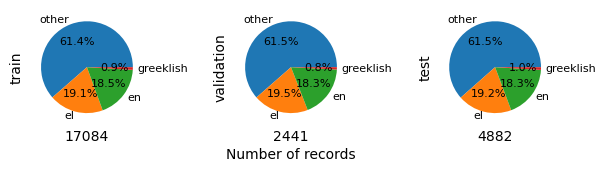

In [36]:
from src.ml import train_test_val_split
import matplotlib.pyplot as plt


data_train, data_val, data_test = train_test_val_split(gold_df, train_ratio=0.7, val_ratio=0.1, test_ratio=0.2,
                                                        random_state=42, stratify_col="labels")
# code block from Ioannis Pavlopoulos
axes = pd.DataFrame({"train": data_train.labels.value_counts(),
              "validation": data_val.labels.value_counts(),
              "test": data_test.labels.value_counts()}
            ).plot.pie(subplots=True, 
                       textprops={'fontsize': 8},
                       autopct=f'%1.1f%%', # print percent% results 
                       legend=False)

axes[0].set_xlabel(data_train.shape[0])
axes[1].set_xlabel(data_val.shape[0])
axes[2].set_xlabel(data_test.shape[0])

axes[1].text(0, -2, 'Number of records', ha='center')

plt.tight_layout(pad=2.0)
plt.show()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


vectorizer = TfidfVectorizer().fit(data_train.text)
x_train = vectorizer.transform(data_train.text)
y_train = data_train.labels
x_val = vectorizer.transform(data_val.text)
y_val = data_val.labels
x_test = vectorizer.transform(data_test.text)
y_test = data_test.labels

In [38]:
from sklearn.model_selection import cross_val_score


def cross_val_res(model, x, y, scoring=None, cv=10):
    if scoring is None:
        scoring = "f1_macro"
    res = cross_val_score(model, x, y, cv=cv, scoring=scoring)
    return res

### Dummy Classifier

In [39]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings


def get_statistics(y_test, y_pred):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        print(f"Macro F1: {f1_score(y_test, y_pred, average='macro', zero_division=0)}")
        print(classification_report(y_test, y_pred, zero_division=0))
        ConfusionMatrixDisplay.from_predictions(y_test, 
                                                y_pred, 
                                                colorbar=True)
        plt.show()

Macro F1: 0.19046411361907176
              precision    recall  f1-score   support

          el       0.00      0.00      0.00       936
          en       0.00      0.00      0.00       895
   greeklish       0.00      0.00      0.00        47
       other       0.62      1.00      0.76      3004

    accuracy                           0.62      4882
   macro avg       0.15      0.25      0.19      4882
weighted avg       0.38      0.62      0.47      4882



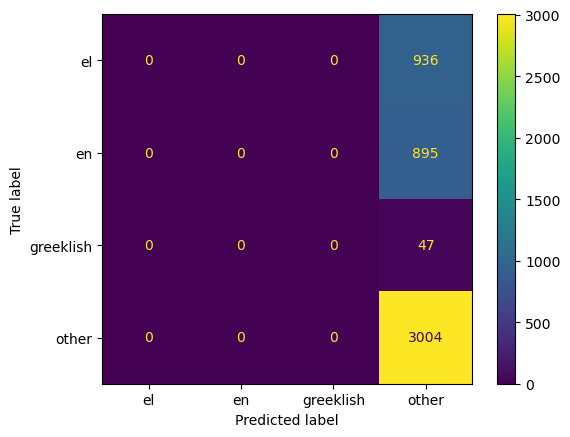

In [40]:
from sklearn.dummy import DummyClassifier, DummyRegressor


majority = DummyClassifier(strategy="most_frequent")
majority.fit(x_train, y_train)
majority_res = majority.predict(x_test)

get_statistics(y_test, majority_res)

### Regex Classification

In [41]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    regex_model = RegexClassifier()
    res = cross_val_res(regex_model, data_train.text, y_train, scoring="f1_macro")
    print(f"Regex Classifier mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

Regex Classifier mean macro F1: 0.5083, std: 0.5066


Macro F1: 0.5078605480596232
              precision    recall  f1-score   support

          el       1.00      1.00      1.00       936
          en       0.32      1.00      0.48       895
   greeklish       0.00      0.00      0.00        47
       other       1.00      0.38      0.55      3004

    accuracy                           0.61      4882
   macro avg       0.58      0.59      0.51      4882
weighted avg       0.87      0.61      0.62      4882



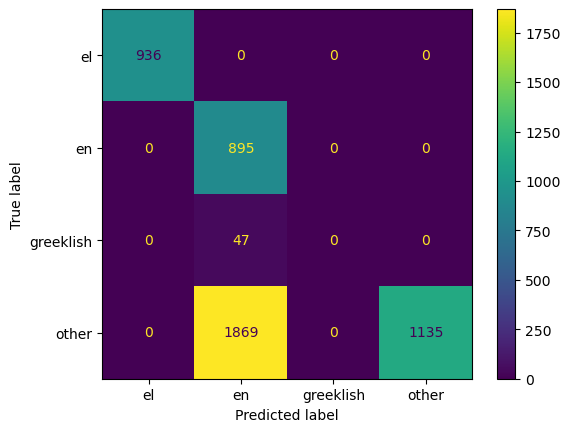

In [42]:
regex_model = RegexClassifier(include_greeklish=True).fit(data_train.text, y_train)
regex_res = regex_model.predict(data_test.text)
get_statistics(y_test, regex_res)

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression


with warnings.catch_warnings():
    # ignore warnings about deprecated methods in libraries
    warnings.simplefilter("ignore")

    lr = LogisticRegression(max_iter=1000)
    res = cross_val_res(lr, x_train, y_train)
    print(f"Logistic Regression mean macro F1-score {res[0]:.4f}, std: {res[1]:.4f}")

Logistic Regression mean macro F1-score 0.8484, std: 0.8892


Macro F1: 0.907607064300836
              precision    recall  f1-score   support

          el       1.00      0.94      0.97       936
          en       1.00      0.97      0.98       895
   greeklish       1.00      0.53      0.69        47
       other       0.97      1.00      0.98      3004

    accuracy                           0.98      4882
   macro avg       0.99      0.86      0.91      4882
weighted avg       0.98      0.98      0.98      4882



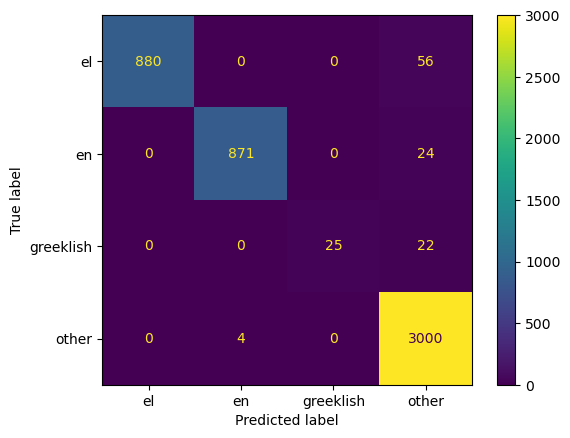

In [44]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)
    lr_res = lr.predict(x_test)

get_statistics(y_test, lr_res)

In [45]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier(n_estimators=50, 
                                      n_jobs=-1, 
                                      criterion="entropy")
res = cross_val_res(forest_model, x_train, y_train, cv=3)
print(f"Random Forest mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

Random Forest mean macro F1: 0.9316, std: 0.9334


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Macro F1: 0.9695480255060236
              precision    recall  f1-score   support

          el       1.00      0.98      0.99       936
          en       0.98      1.00      0.99       895
   greeklish       1.00      0.83      0.91        47
       other       0.99      0.99      0.99      3004

    accuracy                           0.99      4882
   macro avg       0.99      0.95      0.97      4882
weighted avg       0.99      0.99      0.99      4882



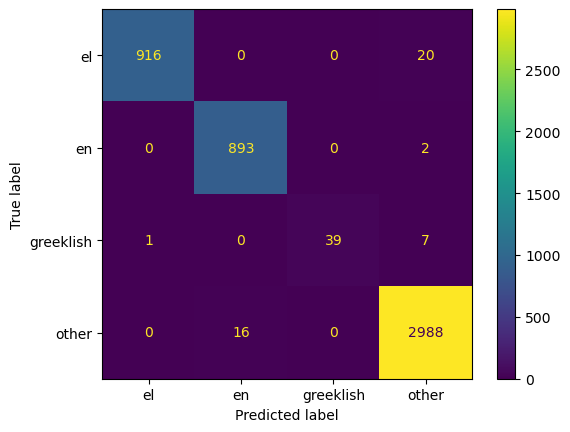

In [46]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier(n_estimators=100, 
                                      n_jobs=-1, 
                                      criterion="entropy", 
                                      verbose=1).fit(x_train, y_train)
forest_pred = forest_model.predict(x_test)
get_statistics(y_test, forest_pred)

### Adaboost

In [47]:
from sklearn.ensemble import AdaBoostClassifier


ada_model = AdaBoostClassifier(n_estimators=50)
res = cross_val_res(ada_model, x_train, y_train, cv=3)
print(f"AdaBoost mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

AdaBoost mean macro F1: 0.8656, std: 0.8711


Macro F1: 0.9010501269649384
              precision    recall  f1-score   support

          el       0.99      0.89      0.94       936
          en       0.98      0.96      0.97       895
   greeklish       0.78      0.68      0.73        47
       other       0.95      0.99      0.97      3004

    accuracy                           0.96      4882
   macro avg       0.93      0.88      0.90      4882
weighted avg       0.96      0.96      0.96      4882



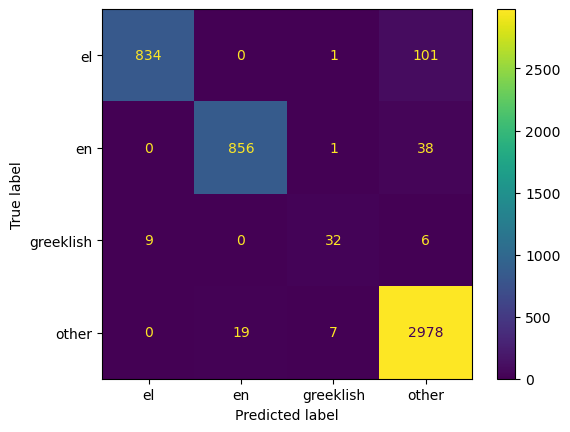

In [48]:
ada_model = AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)
ada_pred = ada_model.predict(x_test)
get_statistics(y_test, ada_pred)

In [49]:
missed = y_test != ada_pred
pd.DataFrame({"predicted": ada_pred[missed], "actual": data_test[missed].labels, "text": data_test[missed].text})

predicted actual                                               text
7466       other     en                         Works better than expected
1738       other     el                 ŒåŒªŒ± œÑŒ± ŒºŒ¨œÑŒπŒ± œÉœÑœÅŒ¨œÜŒ∑Œ∫Œ±ŒΩ œÉ ' Œ±œÖœÑœåŒΩ .
6062       other     el                         ŒëŒªŒÆŒ∏ŒµŒπŒ± , œÄŒøœç Œ∂ŒµŒØœÑŒµ œÑœéœÅŒ± ;
795        other     en             Exactly what I was hoping I would get.
15584  greeklish  other          To na pewno nie jest to, co by≈Ço dawniej.
...          ...    ...                                                ...
6271       other     el                          Œ© , ŒòŒµŒ≠ ŒºŒøœÖ , œÑŒ∑ŒΩ Œ±Œ≥Œ±œÄœé .
18396  greeklish  other  Kt√≥ra rzeczniczka Maria Cheng zgodzi≈Ça siƒô, m√≥...
8100       other     el  Œ∫Œ±ŒªŒ¨ ŒºŒøœÖ œÜŒ±ŒØŒΩŒµœÑŒ±Œπ œåœÑŒπ œÄŒªŒ∑œÅœéŒΩœâ ŒøœçœÑœâœÇ ŒÆ Œ¨ŒªŒªœâœÇ Œ≥Œπ...
3463       other     el                   ŒïŒØœáŒµ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπ Œ±œÖœÑŒÆ œÑŒ∑ œÉœçŒªŒªŒ∑œàŒ∑ ;
3572       other     el                           ŒµŒ¥œé ŒµŒØœÉŒ±Œπ ŒµŒØœÄŒµ Œ±œÄœåœÑŒøŒºŒ± .

[182 rows x 3 columns]

In [50]:
missed = y_test != forest_pred
pd.DataFrame({"predicted": forest_pred[missed], "actual": data_test[missed].labels, "text": data_test[missed].text})

predicted     actual  \
4026        other         el   
2696563     other  greeklish   
16308          en      other   
3107924     other  greeklish   
2434        other         el   
11263          en      other   
878         other         el   
19926          en      other   
1444        other         el   
11369          en      other   
19951          en      other   
16627          en      other   
18616          en      other   
2496700     other  greeklish   
3153672     other  greeklish   
2995730     other  greeklish   
397         other         el   
16536          en      other   
2168        other         el   
2579        other         en   
4545        other         el   
2733        other         el   
2877428     other  greeklish   
2605        other         el   
399         other         en   
21579          en      other   
3100        other         el   
2978543        el  greeklish   
259         other         el   
5217        other         el   
21662          en      other   
2617        other         el   
6355        other         el   
16785          en      other   
2334        other         el   
6345        other         el   
11222          en      other   
14479          en      other   
964         other         el   
10992          en      other   
2943        other         el   
20226          en      other   
4376        other         el   
2591337     other  greeklish   
21100          en      other   
6134        other         el   

                                                      text  
4026       Œó Œ±œÄŒøŒπŒ∫ŒØŒ± œÉŒπŒ≥Œ¨ œÉŒπŒ≥Œ¨ Œ≠Œ≥ŒπŒΩŒµ Œ∫Œ±ŒªœçœÑŒµœÅŒ± ŒøœÅŒ≥Œ±ŒΩœâŒºŒ≠ŒΩŒ∑ .  
2696563       tipota se pvp den exei oloi pve kanete?? -,-  
16308    U will need to take care here , as there may b...  
3107924                                    K r o b a i n h  
2434                                  Œ¶Œ±Œ≥Œ∑œÑœå : 4 Œ±œÉœÑŒ≠œÅŒπŒ± .  
11263    And you know you are my husband and i love you...  
878                                         ŒöŒøŒØœÑŒ±ŒæŒ± Œ≥œçœÅœâ .  
19926    Oh really well nikiwa england years ago na nik...  
1444                             Œ§ŒØœÄŒøœÑŒ± , Œ∫œÖœÅŒØŒ± Œ∫Œ¨Œ≤ŒµŒΩœÑŒπœÇ ;  
11369                           Just how wise katibu mwema  
19951    I think that ' s that ' s that ' s not kuna uw...  
16627                               Got me hii ya prove it  
18616    Yeah hii pango hiyo ilikuwa kidogo ilikuwa ndo...  
2496700                                   an einai dynaton  
3153672                       Mipos eiste sto frostmourne?  
2995730                                       ....deleted.  
397                                    2 ŒΩŒøŒºŒπŒ∫Œ≠œÇ œÖœÄŒ∑œÅŒµœÉŒØŒµœÇ  
16536    Na unajua tumekula hapo sometimes na ni poa sa...  
2168      ŒïŒºœÜœÖœÑŒµœçŒºŒ±œÑŒ± , œàœéŒΩŒπŒ± , Œ±œçŒæŒ∑œÉŒ∑ , œÑŒ≠œÑŒøŒπŒ± œÄœÅŒ¨Œ≥ŒºŒ±œÑŒ± .  
2579            Controversial things about banking system.  
4545                                    ŒìŒµŒªŒ¨ŒµŒπ Œ∫Œ¨Œ∏Œµ œÜŒøœÅŒ¨ .  
2733                                       Œ£ ' ŒµœÖœáŒ±œÅŒπœÉœÑœé .  
2877428       kalos private aksizei na ksekiniseis paidia?  
2605                        Œ•œÄœåŒ≥ŒµŒπŒµœÇ Œ¥ŒµŒæŒ±ŒºŒµŒΩŒ≠œÇ Œ±œÄŒøŒ∏ŒÆŒ∫ŒµœÖœÉŒ∑œÇ  
399                           REPLACED PART IN FAN EXACTLY  
21579    But i ' ve got a class tonight so nilitaka kup...  
3100     ŒîŒπŒµŒ∏ŒΩŒ≠œÇ Œ¥ŒπŒ±œÉœÑŒ∑ŒºŒπŒ∫œå œÉœÑŒ±Œ∏Œºœå œÄœÅœåœâœÉŒ∑œÇ œÉœÖŒºŒ≤Œ¨œÉŒµœâŒΩ , ...  
2978543                                  horde i alliance?  
259                              ŒïŒ∏ŒΩŒπŒ∫œå ŒäŒ¥œÅœÖŒºŒ± ŒïœÄŒπœÉœÑŒ∑ŒºœéŒΩ .  
5217             ŒõŒµŒπœÑŒøœÖœÅŒ≥ŒπŒ∫ŒÆ Œ¥ŒπŒ±œÉœçŒΩŒ¥ŒµœÉŒ∑ œÉœÖœÉœÑŒ∑ŒºŒ¨œÑœâŒΩ ( osi )  
21662    Very performance power i mean wako hapo yeah b...  
2617                                   ŒïŒΩœÑŒ¨ŒæŒµŒπ , Œ∑œÅŒ≠ŒºŒ∑œÉŒµ .  
6355                                ŒöŒ±œÑŒ¨ œÄœÅŒøœÑŒØŒºŒ∑œÉŒ∑ œáœâœÅŒØœÇ .  
16785                           Image of him ooh kama jini  
2334                            Œ†ŒπŒ∏Œ±ŒΩœåœÑŒ∑œÑŒ± Œ±œÄŒø

### Hyperparameter tuning

In [51]:
estimators = []
scores = []

for n_estimators in tqdm([int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]):
    estim = RandomForestClassifier(n_estimators=n_estimators, 
                                  n_jobs=-1, 
                                  criterion="entropy").fit(x_train, y_train)
    score = f1_score(y_val, estim.predict(x_val), average='macro', zero_division=0)

    estimators.append(estim)
    scores.append(score)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [12:57<00:00, 77.73s/it]


In [52]:
best_model = estimators[np.argmax(scores)]

print(f"Best model {best_model} with macro F1 score of {max(scores)}")

Best model RandomForestClassifier(criterion='entropy', n_estimators=788, n_jobs=-1) with macro F1 score of 0.9727416968503323


### Annotating the operational dataset

In [53]:
x_oper = vectorizer.transform(crawl_df.text)
crawl_df["language"] = best_model.predict(x_oper)


In [54]:
csv_output(crawl_df, "crawl.csv")

File saved successfully as output\crawl.csv


In [55]:
print(f"Notebook executed in {int((time()-start)// 60)} minutes and {(time()-start) % 60:.1f} seconds")

Notebook executed in 26 minutes and 59.3 seconds
